In [1]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes
import glob, os


print('Clearing cashes')
print(os.path.abspath('.'))

Clearing cashes
/Users/jzh/Documents/GitHub/Video-Player-Controlled-by-Action-Recognition/src


In [2]:
# initialisation
import csv
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq


In [3]:
# csv reader (faster)
emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


folderPath_hyq = os.path.abspath('./Dataset/new/hyqData/')
folderPath_zjh = os.path.abspath('./Dataset/new/zjhData/')
folderPath_sgf = os.path.abspath('./Dataset/new/sgfData/')

filePathList=[]
filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_zjh, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_sgf, "*.csv")))


for filePathListIndex in filePathList:
    csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
    dl=[]
    print('Reading .csv:')
    for f in filePathListIndex:
        csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
        print(f[-5])

    print(len(csvData['d']))
    print(len(csvData['u']))
    print(len(csvData['l']))
    print(len(csvData['r']))
    print(len(csvData['f']))
    print('Separating EMG signal channels:')
    for currentAction in actionList:
        print(currentAction)
        for row in range(len(csvData[currentAction])):
            emg_1_csv[currentAction].append(csvData[currentAction][row][0])
            emg_2_csv[currentAction].append(csvData[currentAction][row][1])
            emg_3_csv[currentAction].append(csvData[currentAction][row][2])



print('Lengths of each action: (down, up, left, right, and fist)')
print(len(emg_1_csv['d']))
print(len(emg_2_csv['d']))
print(len(emg_3_csv['d']))
print(len(emg_1_csv['u']))
print(len(emg_2_csv['u']))
print(len(emg_3_csv['u']))
print(len(emg_1_csv['l']))
print(len(emg_2_csv['l']))
print(len(emg_3_csv['l']))
print(len(emg_1_csv['r']))
print(len(emg_2_csv['r']))
print(len(emg_3_csv['r']))
print(len(emg_1_csv['f']))
print(len(emg_2_csv['f']))
print(len(emg_3_csv['f']))

Reading .csv:
u
f
r
d
l
16500
15600
17400
15600
15000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
u
f
r
d
l
30000
30000
30000
30000
30000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
u
f
r
d
l
16500
15900
16200
13500
16500
Separating EMG signal channels:
d
u
l
r
f
Lengths of each action: (down, up, left, right, and fist)
63000
63000
63000
61500
61500
61500
63600
63600
63600
59100
59100
59100
61500
61500
61500


Loading: d
210
210
210
Loading: u
205
205
205
Loading: l
212
212
212
Loading: r
197
197
197
Loading: f
205
205
205


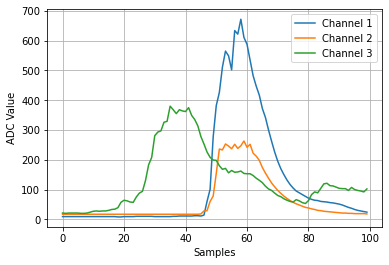

591
595
567
535
532


In [4]:

record_length=300
window_length=100
window_1=50
window_2=40
window_3=30

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

for actionIndex in range(len(actionList)):
    print('Loading: '+actionList[actionIndex])
  
    emg_1_slice = [emg_1_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),record_length)]
    emg_2_slice = [emg_2_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_2_csv[actionList[actionIndex]]),record_length)]
    emg_3_slice = [emg_3_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_3_csv[actionList[actionIndex]]),record_length)]

    print(len(emg_1_slice))
    print(len(emg_2_slice))
    print(len(emg_3_slice))
    

    generatedIndex=0
    for i in range(len(emg_1_slice)-1):
        max_1 = emg_1_slice[i].index(max(emg_1_slice[i]))
        max_2 = emg_2_slice[i].index(max(emg_2_slice[i]))
        max_3 = emg_3_slice[i].index(max(emg_3_slice[i]))
        avgMax=int((max_1+max_2+max_3)/3)
        
        if max_1>window_1 and max_1<record_length-window_1 and max_2>window_1 and max_2<record_length-window_1 and max_3>window_1 and max_3<record_length-window_1:
            
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            generatedIndex+=1
        if max_1>window_2 and max_1<record_length-window_2 and max_2>window_2 and max_2<record_length-window_2 and max_3>window_2 and max_3<record_length-window_2:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            generatedIndex+=1
        if max_1>window_3 and max_1<record_length-window_3 and max_2>window_3 and max_2<record_length-window_3 and max_3>window_3 and max_3<record_length-window_3:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            generatedIndex+=1

            
plt.plot(emg_1_window['d'][0])
plt.plot(emg_2_window['d'][0])
plt.plot(emg_3_window['d'][0])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.grid()
plt.show()

print(len(emg_1_window['d']))
print(len(emg_1_window['u']))
print(len(emg_1_window['l']))
print(len(emg_1_window['r']))
print(len(emg_1_window['f']))

In [5]:
# feature extraction

featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
    emg_1=[]
    emg_2=[]
    emg_3=[]
    print(actionList[actionIndex])
    for row in range(len(emg_1_window[actionList[actionIndex]])):
        emg_1=emg_1_window[actionList[actionIndex]][row]
        emg_2=emg_2_window[actionList[actionIndex]][row]
        emg_3=emg_3_window[actionList[actionIndex]][row]
        
        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0

        # some temporary variables

        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0

        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0

        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1

            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
        
#         print('check')
#         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                             rms_emg_1, rms_emg_2, rms_emg_3]
        featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]




print('Loading completed')

d
u
l
r
f
Loading completed


In [6]:
# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)


x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'l': 1,
        'r': 2,
        'u': 3,
        'd': 4,
        'f': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)

TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)

ModuleNotFoundError: No module named 'keras'

In [7]:
emg1_data, emg2_data, emg3_data = [], [], []
y_raw_val = []

for motion in emg_1_window.keys():
    for window in emg_1_window[motion].values():
        if len(window) == 100:
            emg1_data.append(window)

for motion in emg_2_window.keys():
    for window in emg_2_window[motion].values():
        if len(window) == 100:
            emg2_data.append(window)

for motion in emg_3_window.keys():
    for window in emg_3_window[motion].values():
        if len(window) == 100:
            emg3_data.append(window)
            y_raw_val.append(labelSwitch(motion))

x_raw_val = np.dstack((emg1_data, emg2_data, emg3_data))
y_raw_val = np.array([y_raw_val]).T

print(x_raw_val.shape)
print(y_raw_val.shape)

state = np.random.get_state()
np.random.shuffle(x_raw_val)
np.random.set_state(state)
np.random.shuffle(y_raw_val)

TRAIN_SPLIT = int(0.6*x_raw_val.shape[0])
TEST_SPLIT = int(0.2*x_raw_val.shape[0] + TRAIN_SPLIT)

x_raw_train, x_raw_test, x_raw_validate = np.split(x_raw_val, [TRAIN_SPLIT, TEST_SPLIT])
y_raw_train, y_raw_test, y_raw_validate = np.split(y_raw_val, [TRAIN_SPLIT, TEST_SPLIT])

y_raw_train_class = np_utils.to_categorical(y_raw_train)
y_raw_test_class = np_utils.to_categorical(y_raw_test)
y_raw_validate_class = np_utils.to_categorical(y_raw_validate)

print(x_raw_train.shape)
print(y_raw_train_class.shape)
print(x_raw_validate.shape)
print(y_raw_validate_class.shape)
print(x_raw_test.shape)
print(y_raw_test_class.shape)

(2766, 100, 3)
(2766, 1)
(1659, 100, 3)
(1659, 6)
(554, 100, 3)
(554, 6)
(553, 100, 3)
(553, 6)


In [8]:
import tensorflow as tf
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.layers import *

print(x_raw_train.shape[1:])

def cnn(layers_num, filters, kernel_size, activation):
    backend.clear_session()

    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size,
                     activation=activation, input_shape=x_raw_train.shape[1:]))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))

    for _ in range(layers_num):
        model.add(Conv1D(filters=filters,
                         kernel_size=kernel_size, activation=activation))

    model.add(Conv1D(filters=filters,
                     kernel_size=kernel_size, activation=activation))
    model.add(MaxPooling1D(pool_size=2, strides=1, padding='valid'))
    model.add(Flatten())
    model.add(Dense(6, activation='softmax'))

    model.summary()

    opt = RMSprop(lr=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])

    history = model.fit(x_raw_train, y_raw_train_class, batch_size=32, epochs=20)
    score = model.evaluate(x_raw_test, y_raw_test_class, verbose=0)

    return history.history['accuracy'][-1], score[1]

(100, 3)


In [ ]:
cnn(3, 128, 3, 'relu')
model.save('src/ML_Models')

In [9]:
traning_accuracies = [[],[],[]]
validation_accuracies = [[],[],[]]
labels = [[],[],[]]

# ReLU with different layers
t1, v1 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'relu')
t2, v2 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'relu')
t3, v3 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'relu')
t4, v4 = cnn(layers_num=4, filters=32, kernel_size=3, activation = 'relu')
traning_accuracies[0].append([t1, t2, t3, t4])
validation_accuracies[0].append([v1, v2, v3, v4])
labels[0].append(['1', '2', '3', '4'])

# ReLU with different filters
t1, v1 = cnn(layers_num=1, filters=16, kernel_size=3, activation = 'relu')
t2, v2 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'relu')
t3, v3 = cnn(layers_num=1, filters=64, kernel_size=3, activation = 'relu')
t4, v4 = cnn(layers_num=1, filters=128, kernel_size=3, activation = 'relu')
traning_accuracies[0].append([t1, t2, t3, t4])
validation_accuracies[0].append([v1, v2, v3, v4])
labels[0].append(['16', '32', '64', '128'])

# ReLU with different kernel size
t1, v1 = cnn(layers_num=1, filters=32, kernel_size=2, activation = 'relu')
t2, v2 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'relu')
t3, v3 = cnn(layers_num=1, filters=32, kernel_size=4, activation = 'relu')
t4, v4 = cnn(layers_num=1, filters=32, kernel_size=5, activation = 'relu')
traning_accuracies[0].append([t1, t2, t3, t4])
validation_accuracies[0].append([v1, v2, v3, v4])
labels[0].append(['2', '3', '4', '5'])

# 1 layer comparation
t1, v1 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'relu')
t2, v2 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'elu')
t3, v3 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'sigmoid')
t4, v4 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'tanh')
traning_accuracies[1].append([t1, t2, t3, t4])
validation_accuracies[1].append([v1, v2, v3, v4])
labels[1].append(['relu', 'elu', 'sigmoid', 'tanh'])

# 2 layers comparation
t1, v1 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'relu')
t2, v2 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'elu')
t3, v3 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'sigmoid')
t4, v4 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'tanh')
traning_accuracies[1].append([t1, t2, t3, t4])
validation_accuracies[1].append([v1, v2, v3, v4])
labels[1].append(['relu', 'elu', 'sigmoid', 'tanh'])

# sigmoid comparation
t1, v1 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'relu')
t2, v2 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'elu')
t3, v3 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'sigmoid')
t4, v4 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'tanh')
traning_accuracies[1].append([t1, t2, t3, t4])
validation_accuracies[1].append([v1, v2, v3, v4])
labels[1].append(['relu', 'elu', 'sigmoid', 'tanh'])

# sigmoid comparation
t1, v1 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'sigmoid')
t2, v2 = cnn(layers_num=2, filters=32, kernel_size=3, activation = 'sigmoid')
t3, v3 = cnn(layers_num=3, filters=32, kernel_size=3, activation = 'sigmoid')
t4, v4 = cnn(layers_num=4, filters=32, kernel_size=3, activation = 'sigmoid')
traning_accuracies[2].append([t1, t2, t3, t4])
validation_accuracies[2].append([v1, v2, v3, v4])
labels[2].append(['1', '2', '3', '4'])

# sigmoid comparation
t1, v1 = cnn(layers_num=1, filters=16, kernel_size=3, activation = 'sigmoid')
t2, v2 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'sigmoid')
t3, v3 = cnn(layers_num=1, filters=64, kernel_size=3, activation = 'sigmoid')
t4, v4 = cnn(layers_num=1, filters=128, kernel_size=3, activation = 'sigmoid')
traning_accuracies[2].append([t1, t2, t3, t4])
validation_accuracies[2].append([v1, v2, v3, v4])
labels[2].append(['16', '32', '64', '128'])

# sigmoid comparation
t1, v1 = cnn(layers_num=1, filters=32, kernel_size=2, activation = 'sigmoid')
t2, v2 = cnn(layers_num=1, filters=32, kernel_size=3, activation = 'sigmoid')
t3, v3 = cnn(layers_num=1, filters=32, kernel_size=4, activation = 'sigmoid')
t4, v4 = cnn(layers_num=1, filters=32, kernel_size=5, activation = 'sigmoid')
traning_accuracies[2].append([t1, t2, t3, t4])
validation_accuracies[2].append([v1, v2, v3, v4])
labels[2].append(['2', '3', '4', '5'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 98, 32)            320       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 97, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 95, 32)            3104      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 93, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 92, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2944)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 1

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv1d/conv1d (defined at <ipython-input-8-12c1ddf81756>:34) ]] [Op:__inference_train_function_1013]

Function call stack:
train_function


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(3, 3, sharey='row', figsize=(16, 16))

x = [[],[],[]]
width = 0.4

for i in range(len(labels)):
    for j in range(len(labels[i])):
        x[i].append(np.arange(len(labels[i][j])))

for i in range(len(traning_accuracies)):
    for j in range(len(traning_accuracies[i])):
        axs[i][j].bar(x[i][j] - width/2, traning_accuracies[i][j], width, label='Training Accuracy')
        axs[i][j].bar(x[i][j] + width/2, validation_accuracies[i][j], width, label='Validation Accuracy')
        axs[i][j].set_xticks(x[i][j])
        axs[i][j].set_xticklabels(labels[i][j])
        
        if j == 1:
          if i == 0:
            axs[i][j].set_title("ReLU with different layers, filters, and kernel sizes")
          if i == 1:
            axs[i][j].set_title("Different activition functions")
          if i == 2:
            axs[i][j].set_title("Sigmoid with different layers, filters, and kernel sizes")


NameError: name 'labels' is not defined